Proportion of CIs covering Pop mean 0.93


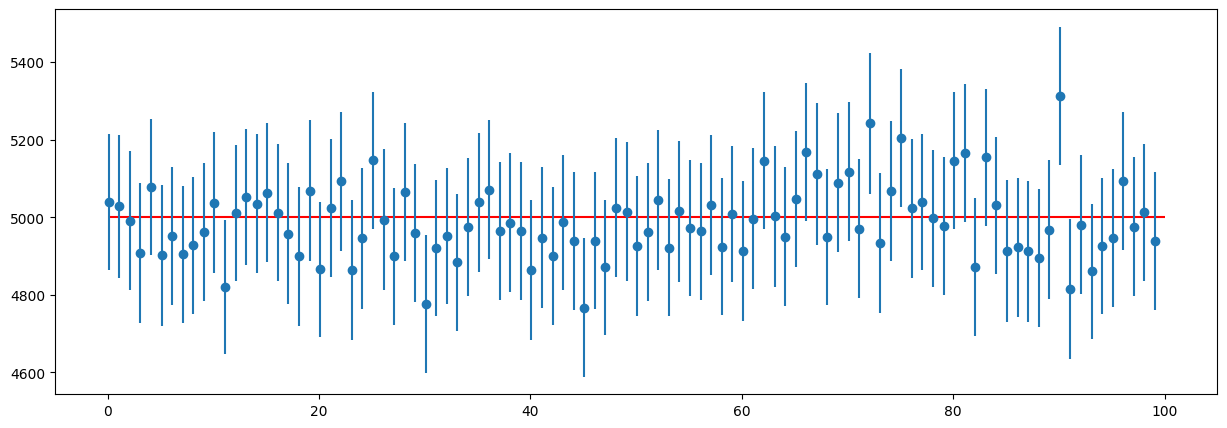

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm,t
import random

population = np.arange(1, 10**4) #random population
pop_mean = np.mean(population)

def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        #a sample of size sample_size will be taken
        sample = random.sample(list(population), sample_size)
        #mean of the samples appended to sample_means
        sample_means.append(np.mean(sample))
        #ci=tuple(lower,upper)
        #For each sample, a 95% confidence interval (CI) is calculated
        ci = norm.interval(0.95, np.mean(sample), 
                            np.std(sample, ddof =1)/sqrt(sample_size))
        # ddof=1 mean divisor is N-1 instead of N
        # estimate the standard error of the mean (SEM) for the given sample
        intervals.append(ci)
        #upcount only if pop_mean lies in confidence interval
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
            
    print('Proportion of CIs covering Pop mean', count/no_of_samples)#percentage
    plt.figure(figsize=(15,5))
    #print the horizontal line(red line) which is pop_mean
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    #print the sample lines with their means indicated as 'o'
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()
    
#pass sample_size, no_of_samples
sampling(1000, 100)

In [3]:
#CI for population where 85% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

#parameters....population, required_CI(desired), sample_size, no_of_samples
def CI(pop, ci, samp_size, no_of_samples):
    print("\nfor ci of", ci, "sample_size", samp_size)
    pop_mean = np.mean(pop)
    print('actual mean :',pop_mean)
    
    #calculation of same using CI
    samp_means = []      #mean of all the samples 
    for i in range(no_of_samples):
        samp_means.append(np.mean(sample(pop, samp_size)))
    
    #calculation of interval
    print('mean of samples :', np.mean(samp_means))
    pop_stdev = np.std(samp_means) / math.sqrt(samp_size)
    z = st.norm.ppf(ci)#critical z-score corresponding to the desired confidence level is calculated
    print("confidence interval :", pop_mean, "+-", z*pop_stdev)
    plt.hist(samp_means)
    plt.show()
    
pop = sample(range(1, 2*10**5), 10**4)  #random population generation



for ci of 0.85 sample_size 1000
actual mean : 99146.6432
mean of samples : 99142.73336500001
confidence interval : 99146.6432 +- 54.66546197280993


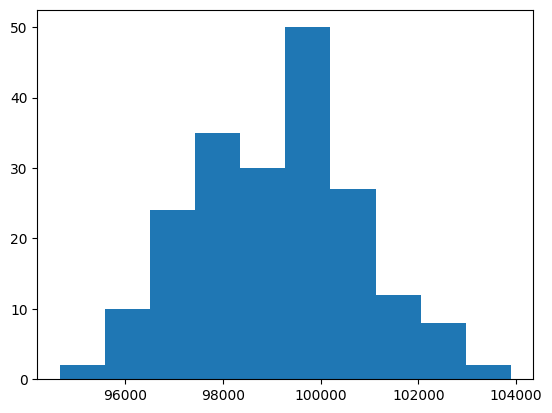


for ci of 0.85 sample_size 1000
actual mean : 99146.6432
mean of samples : 99033.766712
confidence interval : 99146.6432 +- 57.9230899033445


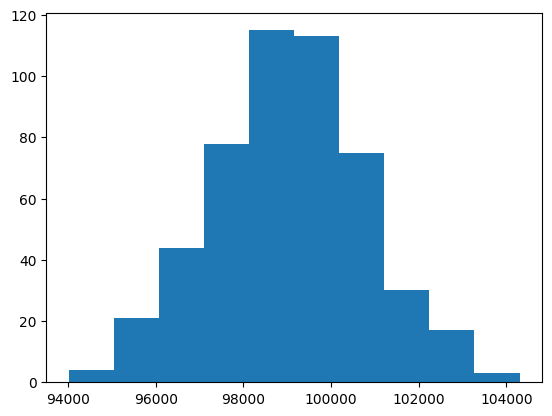


for ci of 0.85 sample_size 1000
actual mean : 99146.6432
mean of samples : 99187.989508
confidence interval : 99146.6432 +- 57.311895189306895


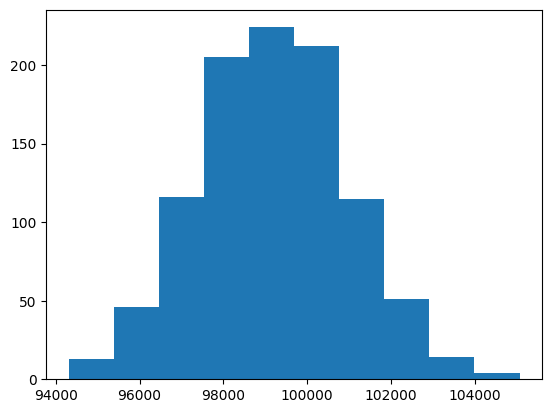

In [4]:
#varying no_of_samples
CI(pop, 0.85, 1000, 200)
CI(pop, 0.85, 1000, 500)
CI(pop, 0.85, 1000, 1000)
#shape of the curve becomes normal as the no of samples increases(samp_mean better approx of actual mean)


for ci of 0.85 sample_size 100
actual mean : 99146.6432
mean of samples : 98540.41347999999
confidence interval : 99146.6432 +- 561.0548120230834


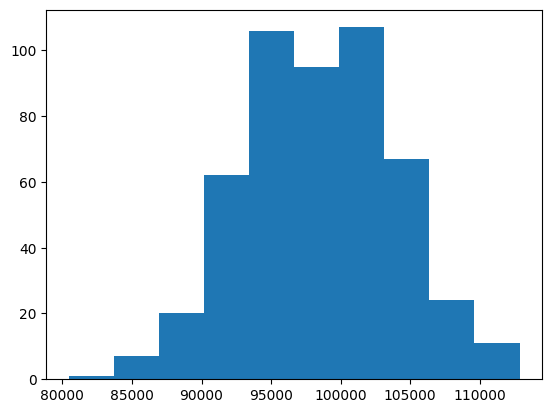


for ci of 0.85 sample_size 500
actual mean : 99146.6432
mean of samples : 99195.104124
confidence interval : 99146.6432 +- 117.303934749667


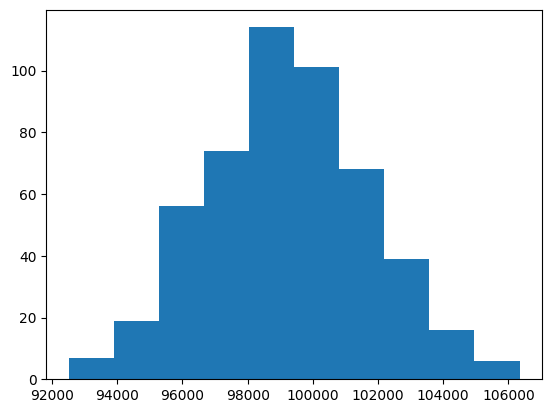


for ci of 0.85 sample_size 1000
actual mean : 99146.6432
mean of samples : 99043.53352000001
confidence interval : 99146.6432 +- 54.886154871540036


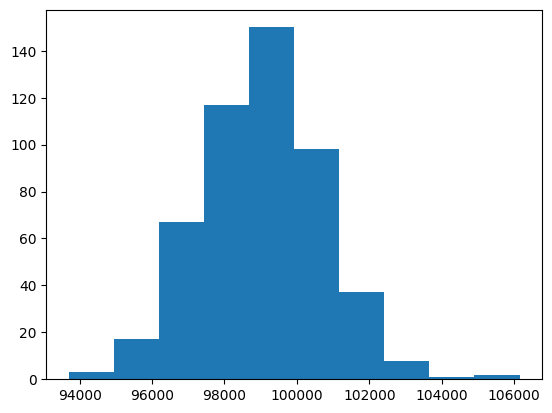

In [5]:
#varying sample size
CI(pop, 0.85, 100, 500)
CI(pop, 0.85, 500, 500)
CI(pop, 0.85, 1000, 500)
#reduction in the size of interval as sample_size increases(better approx of population)

Confidence Level 99.00004355246759


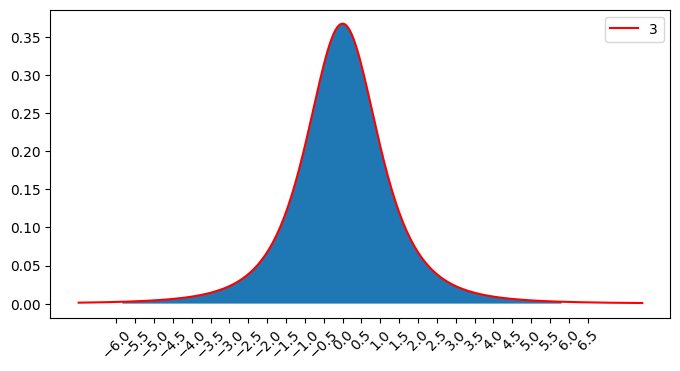

In [9]:
x = np.arange(-7, 8, 1/20)
# draw pdf with n-1 dof
# shad area between -t_score and t_scoreS
def ci(t_score, n):
    plt.figure(figsize=(8,4))
    #gives the whole area under the graph
    area = t.cdf(t_score, n - 1) - t.cdf(-t_score, n - 1)
    #calculates the area under the t-distribution curve between -t_score and t_score.
    print('Confidence Level', area * 100)#percentage
    plt.plot(x, t.pdf(x, n - 1), color= 'red',label= n - 1)
    #to fill from -t end to +t end
    section = np.arange(-t_score, t_score, 1/20)
    #section represents the interval from -t_score to t_score.
    plt.fill_between(section, t.pdf(section, n - 1))
    plt.xticks(np.arange(-6,7,0.5), rotation = 45)
    plt.legend(loc = 'upper right')
    plt.show()
    
ci(5.841, 4)